# k-Nearest Neighbor

In [1]:
###### IMPORTS ######
import os
import glob
from imutils import paths
import cv2
import numpy as np
import matplotlib.pyplot as plt
from knn_classifier import kNearestNeighbor

# This is a bit of magic to make matplotlib figures appear inline in the notebook
# rather than in a new window.
%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 9) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

In [2]:
###### GLOBAL VARIABLES ######
# Labels
BACKGROUND = 0
POTATO = 1
CARROT = 2
CAT_SAL = 3
CAT_BEEF = 4
BUN = 5
ARM = 6
KETCHUP = 7

# Background mask
BGD_MASK = cv2.imread('../preprocessing/bgd_mask.jpg', cv2.IMREAD_COLOR)

# Average background image
AVG_BGD_MASK = cv2.imread('../preprocessing/avg_background.jpg', cv2.IMREAD_COLOR)

# Test directories
BGD_TEST_DIR = glob.glob('../dataset3/res_crop/test/background/*.jpg')
POTATO_TEST_DIR = glob.glob('../dataset3/res_crop/test/potato/*.jpg')
CARROT_TEST_DIR = glob.glob('../dataset3/res_crop/test/carrots/*jpg')
CAT_SAL_TEST_DIR = glob.glob('../dataset3/res_crop/test/catfood_salmon/*.jpg')
CAT_BEEF_TEST_DIR = glob.glob('../dataset3/res_crop/test/catfood_beef/*.jpg')
BUN_TEST_DIR = glob.glob('../dataset3/res_crop/test/bun/*.jpg')
ARM_TEST_DIR = glob.glob('../dataset3/res_crop/test/arm/*.jpg')
KETCHUP_TEST_DIR = glob.glob('../dataset3/res_crop/test/ketchup/*.jpg')

# Train directories
BGD_TRAIN_DIR = glob.glob('../dataset3/res_crop/train/background/*.jpg')
POTATO_TRAIN_DIR = glob.glob('../dataset3/res_crop/train/potato/*.jpg')
CARROT_TRAIN_DIR = glob.glob('../dataset3/res_crop/train/carrots/*jpg')
CAT_SAL_TRAIN_DIR = glob.glob('../dataset3/res_crop/train/catfood_salmon/*.jpg')
CAT_BEEF_TRAIN_DIR = glob.glob('../dataset3/res_crop/train/catfood_beef/*.jpg')
BUN_TRAIN_DIR = glob.glob('../dataset3/res_crop/train/bun/*.jpg')
ARM_TRAIN_DIR = glob.glob('../dataset3/res_crop/train/arm/*.jpg')
KETCHUP_TRAIN_DIR = glob.glob('../dataset3/res_crop/train/ketchup/*.jpg')

In [3]:
###### FUNCTIONS ######
def time_function(func, *args):
    """ 
    Call a function, func, with args and return the time, in [s],
    that it took to execute.
    """
    
    import time
    tic = time.time()
    func(*args)
    toc = time.time()
    
    return toc - tic

def extract_hist(image, bins=(8, 8, 8)):
    """
    Extracts a 3D color histogram from the hsv color space using
    the supplied number of bins per channel.
    """
    
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    hist = cv2.calcHist(images=[hsv],
                       channels=[0, 1, 2],
                       mask=None,
                       histSize=bins,
                       ranges=[0, 180, 0, 256, 0, 256])
    cv2.normalize(src=hist, dst=hist)
    return hist.flatten()

## Cropped image with no filter

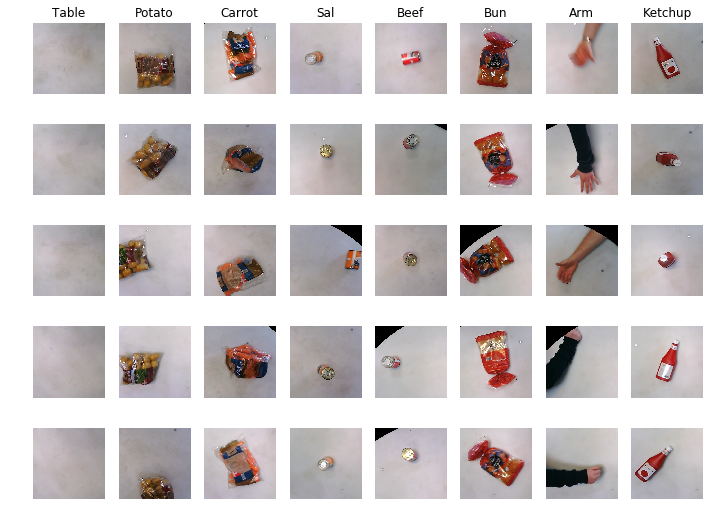

In [4]:
def convert_label_to_number(label):
    """ Converts label to number """

    result = None
    if label == 'bgd':
        result = 0
    elif label == 'potato':
        result = 1
    elif label == 'carrot':
        result = 2
    elif label == 'beef':
        result = 3
    elif label == 'sal':
        result = 4
    elif label == 'bun':
        result = 5
    elif label == 'arm':
        result = 6
    elif label == 'ketchup':
        result = 7
    return result

def import_data(X, y, path, show_img):
    """ Imports data """

    image_paths = list(paths.list_images(path))
    if show_img is True:
        images = []
    for i, image_path in enumerate(image_paths):
        img = cv2.imread(image_path, cv2.IMREAD_COLOR)
        label = image_path.split(os.path.sep)[-1].split('_')[0]
        label = convert_label_to_number(label)
        hist = extract_hist(img)
        X.append(hist)
        y.append(label)
        if show_img is True:
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            images.append(img)
    if show_img is True:
        return images

###### IMPORT TRAIN DATA ######
X_train = []
y_train = []
path = 'cropped_images/train/'
import_data(X_train, y_train, path, False)

###### IMPORT TEST DATA ######
X_test = []
y_test = []
path = 'cropped_images/test/'
images = import_data(X_test, y_test, path, True)
classes = ['Table','Potato','Carrot','Sal','Beef','Bun','Arm','Ketchup']
num_classes = len(classes)
samples_per_class = 5
plt.figure(figsize=(12, 9))
for y, cls in enumerate(classes):
    idxs = [i for i, label in enumerate(y_test) if label == y]
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(images[idx].astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()


[INFO]:
Histogram train matrix: 3.75MB
Histogram test matrix: 0.94MB
Train data shape: (1875, 512)
Tain labels shape: (1875,)
Test data shape: (472, 512)
Test labels shape: (472,)
Distance shape: (472, 1875)


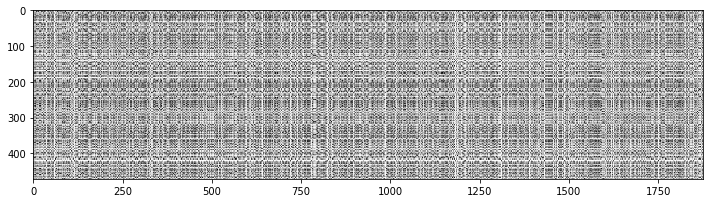

Time performance: 0.009952306747436523 seconds


In [5]:
###### INFORMATION ######
print('\n[INFO]:')

X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)
print('Histogram train matrix: {:.2f}MB'.format(X_train.nbytes / (1024 * 1000.0)))
print('Histogram test matrix: {:.2f}MB'.format(X_test.nbytes / (1024 * 1000.0)))
print('Train data shape:', X_train.shape)
print('Tain labels shape:', y_train.shape)
print('Test data shape:', X_test.shape)
print('Test labels shape:', y_test.shape)

###### CREATE AND TRAIN CLASSIFIER ######
classifier = kNearestNeighbor()
classifier.train(X_train, y_train)

# Test implementation
dists = classifier.compute_distances_no_loops(X_test)
print('Distance shape:', dists.shape)
plt.figure(figsize=(12, 9))
plt.imshow(dists, interpolation='none')
plt.show()

# Time performance
time = time_function(classifier.compute_distances_no_loops, X_test)
print('Time performance:', time, 'seconds')

### Cross-validation

k = 1, accuracy = 0.548729
k = 1, accuracy = 0.476695
k = 1, accuracy = 0.552966
k = 1, accuracy = 0.538136
k = 1, accuracy = 0.552966
k = 3, accuracy = 0.533898
k = 3, accuracy = 0.470339
k = 3, accuracy = 0.514831
k = 3, accuracy = 0.489407
k = 3, accuracy = 0.527542
k = 5, accuracy = 0.521186
k = 5, accuracy = 0.470339
k = 5, accuracy = 0.493644
k = 5, accuracy = 0.483051
k = 5, accuracy = 0.497881
k = 8, accuracy = 0.533898
k = 8, accuracy = 0.457627
k = 8, accuracy = 0.504237
k = 8, accuracy = 0.506356
k = 8, accuracy = 0.491525
k = 10, accuracy = 0.536017
k = 10, accuracy = 0.472458
k = 10, accuracy = 0.491525
k = 10, accuracy = 0.491525
k = 10, accuracy = 0.495763
k = 12, accuracy = 0.510593
k = 12, accuracy = 0.468220
k = 12, accuracy = 0.474576
k = 12, accuracy = 0.472458
k = 12, accuracy = 0.500000
k = 15, accuracy = 0.519068
k = 15, accuracy = 0.451271
k = 15, accuracy = 0.463983
k = 15, accuracy = 0.451271
k = 15, accuracy = 0.506356
k = 20, accuracy = 0.506356
k = 20, accu

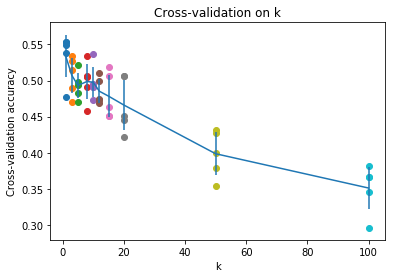

In [6]:
num_folds = 5
k_choices = [1, 3, 5, 8, 10, 12, 15, 20, 50, 100]
X_train_folds = []
y_train_folds = []

# Split training data into folds
X_train_folds = np.array(np.array_split(X_train, num_folds))
y_train_folds = np.array(np.array_split(y_train, num_folds))

# A dictionary holding the accuracies to find the best value of k
k_to_accuracies = {}

# Perform k-fold cross validation to find the best value of k
for k in k_choices:
    for j in range(num_folds):
        all_but_one_ind = [i for i in range(num_folds) if i != j]
        X_all_but_one = np.concatenate(X_train_folds[all_but_one_ind])
        y_all_but_one = np.concatenate(y_train_folds[all_but_one_ind])
        knn = kNearestNeighbor()
        knn.train(X_all_but_one, y_all_but_one)
        y_pred_k_f = knn.predict(X_train_folds[j], k)
        acc = float(sum(y_pred_k_f == y_train_folds[j])) / X_test.shape[0]
        if k not in k_to_accuracies:
            k_to_accuracies[k] = []
        k_to_accuracies[k].append(acc)

# Print out the computed accuracies
for k in sorted(k_to_accuracies):
    for accuracy in k_to_accuracies[k]:
        print('k = %d, accuracy = %f' % (k, accuracy))

# Plot the raw observations
for k in k_choices:
    accuracies = k_to_accuracies[k]
    plt.scatter([k] * len(accuracies), accuracies)
    
# Plot the trend line with error bars that corresponde to standard deviation
accuracies_mean = np.array([np.mean(v) for k, v in sorted(k_to_accuracies.items())])
accuracies_std = np.array([np.std(v) for k, v in sorted(k_to_accuracies.items())])
plt.errorbar(k_choices, accuracies_mean, yerr=accuracies_std)
plt.title('Cross-validation on k')
plt.xlabel('k')
plt.ylabel('Cross-validation accuracy')
plt.show()

### Best value of k

Based on the cross-validation results above, the best value for k is choosen. The classifier is retrained using all the training data and then tested on the test data.

In [7]:
best_k = 1
classifier = kNearestNeighbor()
classifier.train(X_train, y_train)
y_test_pred = classifier.predict(X_test, k=best_k)

# Compute and display the accuracy
num_correct = np.sum(y_test_pred == y_test)
accuracy = float(num_correct) / X_test.shape[0]
print('Got %d / %d correct' % (num_correct, X_test.shape[0]))
print('Accuracy: %f' % accuracy)

Got 348 / 472 correct
Accuracy: 0.737288


## Cropped images with filter

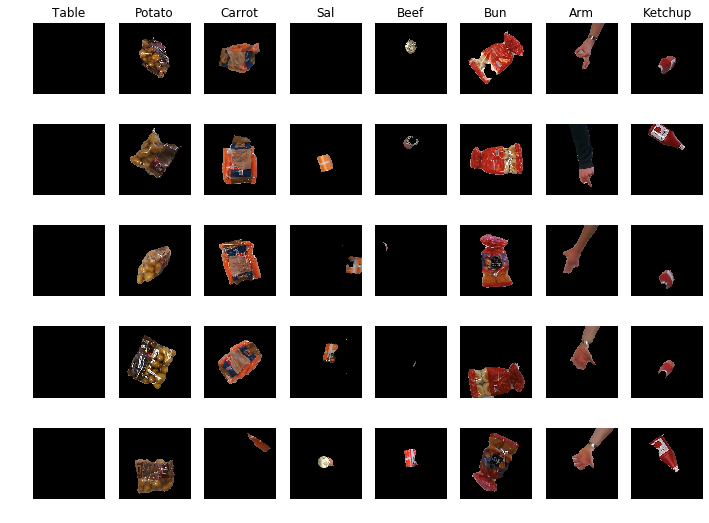

In [8]:
def convert_label_to_number(label):
    """ Converts label to number """

    result = None
    if label == 'bgd':
        result = 0
    elif label == 'potato':
        result = 1
    elif label == 'carrot':
        result = 2
    elif label == 'beef':
        result = 3
    elif label == 'sal':
        result = 4
    elif label == 'bun':
        result = 5
    elif label == 'arm':
        result = 6
    elif label == 'ketchup':
        result = 7
    return result

def import_data(X, y, path, show_img):
    """ Imports data """

    lower = (0, 65, 0)
    upper = (179, 255, 255)
    image_paths = list(paths.list_images(path))
    if show_img is True:
        images = []
    for i, image_path in enumerate(image_paths):
        image = cv2.imread(image_path, cv2.IMREAD_COLOR)
        label = image_path.split(os.path.sep)[-1].split('_')[0]
        label = convert_label_to_number(label)
        hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
        mask = cv2.inRange(src=hsv, lowerb=lower, upperb=upper)
        kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (30, 30))
        mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)
        img = cv2.bitwise_and(image, image, mask=mask)
        #img = cv2.bitwise_and(img, BGD_MASK)
        hist = extract_hist(img)
        X.append(hist)
        y.append(label)
        if show_img is True:
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            images.append(img)
    if show_img is True:
        return images

###### IMPORT TRAIN DATA ######
X_train = []
y_train = []
path = 'cropped_images/train/'
import_data(X_train, y_train, path, False)

###### IMPORT TEST DATA ######
X_test = []
y_test = []
path = 'cropped_images/test/'
images = import_data(X_test, y_test, path, True)
classes = ['Table','Potato','Carrot','Sal','Beef','Bun','Arm','Ketchup']
num_classes = len(classes)
samples_per_class = 5
plt.figure(figsize=(12, 9))
for y, cls in enumerate(classes):
    idxs = [i for i, label in enumerate(y_test) if label == y]
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(images[idx].astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()


[INFO]:
Histogram train matrix: 3.75MB
Histogram test matrix: 0.94MB
Train data shape: (1875, 512)
Tain labels shape: (1875,)
Test data shape: (472, 512)
Test labels shape: (472,)
Distance shape: (472, 1875)


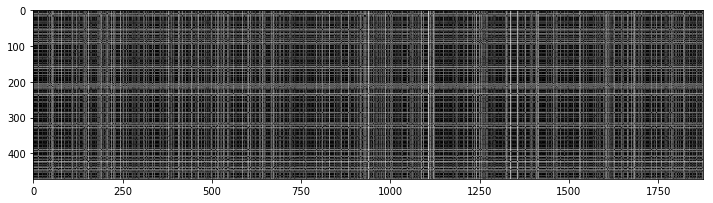

Time performance: 0.012152671813964844 seconds


In [9]:
###### INFORMATION ######
print('\n[INFO]:')
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)
print('Histogram train matrix: {:.2f}MB'.format(X_train.nbytes / (1024 * 1000.0)))
print('Histogram test matrix: {:.2f}MB'.format(X_test.nbytes / (1024 * 1000.0)))
print('Train data shape:', X_train.shape)
print('Tain labels shape:', y_train.shape)
print('Test data shape:', X_test.shape)
print('Test labels shape:', y_test.shape)

###### CREATE AND TRAIN CLASSIFIER ######
classifier = kNearestNeighbor()
classifier.train(X_train, y_train)

# Test implementation
dists = classifier.compute_distances_no_loops(X_test)
print('Distance shape:', dists.shape)
plt.figure(figsize=(12, 9))
plt.imshow(dists, interpolation='none')
plt.show()

# Time performance
time = time_function(classifier.compute_distances_no_loops, X_test)
print('Time performance:', time, 'seconds')

### Cross-validation

k = 1, accuracy = 0.747881
k = 1, accuracy = 0.745763
k = 1, accuracy = 0.682203
k = 1, accuracy = 0.692797
k = 1, accuracy = 0.661017
k = 3, accuracy = 0.754237
k = 3, accuracy = 0.743644
k = 3, accuracy = 0.680085
k = 3, accuracy = 0.750000
k = 3, accuracy = 0.745763
k = 5, accuracy = 0.747881
k = 5, accuracy = 0.739407
k = 5, accuracy = 0.756356
k = 5, accuracy = 0.750000
k = 5, accuracy = 0.741525
k = 8, accuracy = 0.752119
k = 8, accuracy = 0.737288
k = 8, accuracy = 0.745763
k = 8, accuracy = 0.735169
k = 8, accuracy = 0.735169
k = 10, accuracy = 0.750000
k = 10, accuracy = 0.733051
k = 10, accuracy = 0.739407
k = 10, accuracy = 0.730932
k = 10, accuracy = 0.733051
k = 12, accuracy = 0.750000
k = 12, accuracy = 0.724576
k = 12, accuracy = 0.735169
k = 12, accuracy = 0.726695
k = 12, accuracy = 0.728814
k = 15, accuracy = 0.741525
k = 15, accuracy = 0.722458
k = 15, accuracy = 0.733051
k = 15, accuracy = 0.726695
k = 15, accuracy = 0.735169
k = 20, accuracy = 0.741525
k = 20, accu

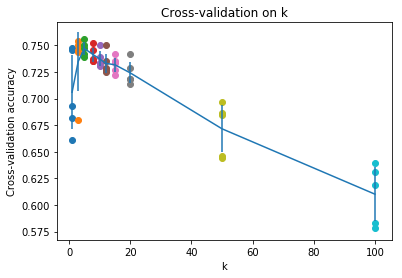

In [10]:
num_folds = 5
k_choices = [1, 3, 5, 8, 10, 12, 15, 20, 50, 100]
X_train_folds = []
y_train_folds = []

# Split training data into folds
X_train_folds = np.array(np.array_split(X_train, num_folds))
y_train_folds = np.array(np.array_split(y_train, num_folds))

# A dictionary holding the accuracies to find the best value of k
k_to_accuracies = {}

# Perform k-fold cross validation to find the best value of k
for k in k_choices:
    for j in range(num_folds):
        all_but_one_ind = [i for i in range(num_folds) if i != j]
        X_all_but_one = np.concatenate(X_train_folds[all_but_one_ind])
        y_all_but_one = np.concatenate(y_train_folds[all_but_one_ind])
        knn = kNearestNeighbor()
        knn.train(X_all_but_one, y_all_but_one)
        y_pred_k_f = knn.predict(X_train_folds[j], k)
        acc = float(sum(y_pred_k_f == y_train_folds[j])) / X_test.shape[0]
        if k not in k_to_accuracies:
            k_to_accuracies[k] = []
        k_to_accuracies[k].append(acc)

# Print out the computed accuracies
for k in sorted(k_to_accuracies):
    for accuracy in k_to_accuracies[k]:
        print('k = %d, accuracy = %f' % (k, accuracy))

# Plot the raw observations
for k in k_choices:
    accuracies = k_to_accuracies[k]
    plt.scatter([k] * len(accuracies), accuracies)
    
# Plot the trend line with error bars that corresponde to standard deviation
accuracies_mean = np.array([np.mean(v) for k, v in sorted(k_to_accuracies.items())])
accuracies_std = np.array([np.std(v) for k, v in sorted(k_to_accuracies.items())])
plt.errorbar(k_choices, accuracies_mean, yerr=accuracies_std)
plt.title('Cross-validation on k')
plt.xlabel('k')
plt.ylabel('Cross-validation accuracy')
plt.show()

### Best value of k

Based on the cross-validation results above, the best value for k is choosen. The classifier is retrained using all the training data and then tested on the test data.

In [11]:
best_k = 3
classifier = kNearestNeighbor()
classifier.train(X_train, y_train)
y_test_pred = classifier.predict(X_test, k=best_k)

# Compute and display the accuracy
num_correct = np.sum(y_test_pred == y_test)
accuracy = float(num_correct) / X_test.shape[0]
print('Got %d / %d correct' % (num_correct, X_test.shape[0]))
print('Accuracy: %f' % accuracy)

Got 450 / 472 correct
Accuracy: 0.953390
